# Skin Cancer Detection, Melanoma- Using MobileNetV2

### Problem Statement

To build a MobileNet based model which can accurately detect melanoma. 

Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis. Accurate diagnosis requires expert dermatological evaluation, which might not be available in rural, underserved or low income regions.

* There is need for accurate, fast and accessible AI-Based solution, hence the building of this model

### About MobileNet

MobileNetV2 is a convolutional neural network (CNN) model developed by Google as part of the MobileNet series. This model is known for its high efficiency and speed, making it ideal for applications requiring low-resource processing, such as mobile applications.

##### Key Features of the MobileNetV2 Model Convolutional Architecture:

MobileNetV2 relies on "depthwise separable convolutions" designed to reduce the number of computational operations and memory usage, making the model lighter and faster compared to traditional models. 

Inverted Residual Blocks:

MobileNetV2 uses inverted residual blocks, which consist of bottleneck layers and depthwise separable convolutions. These blocks help improve the overall performance of the model and enhance its ability to learn from data. 

Improvements over MobileNetV1:

Linear Bottlenecks: MobileNetV2 uses linear bottlenecks to reduce the size of intermediate representations within the model, contributing to reduced complexity. 

Nonlinear Activation: ReLU activation is replaced with ReLU6, which helps improve model performance in certain contexts. 

Performance:

Speed: MobileNetV2 is designed to be fast on resource-constrained devices such as mobile phones. 


Accuracy: It provides good performance in image classification while maintaining a small model size.

### Lets Begin

### Import Necessary Libraries

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os                       # for working with files
import seaborn as sns
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
# from torchsummary import summary  
import matplotlib.image as mpimg# for getting the summary of our model
import random

# from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

### Partition our Data

In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2

In [3]:
train_dir = "/kaggle/input/melanoma-cancer-dataset/melanoma_cancer_dataset/train"
test_dir = "/kaggle/input/melanoma-cancer-dataset/melanoma_cancer_dataset/test"

In [5]:
# Set dataset path
dataset_path = "/kaggle/input/melanoma-cancer-dataset/melanoma_cancer_dataset/train"


# List class folders
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

# Show class distribution
for cls in classes:
    count = len(os.listdir(os.path.join(dataset_path, cls)))
    print(f"{cls}: {count} images")

Classes found: ['benign', 'malignant']
benign: 5000 images
malignant: 4605 images


### Display Image of our dataset

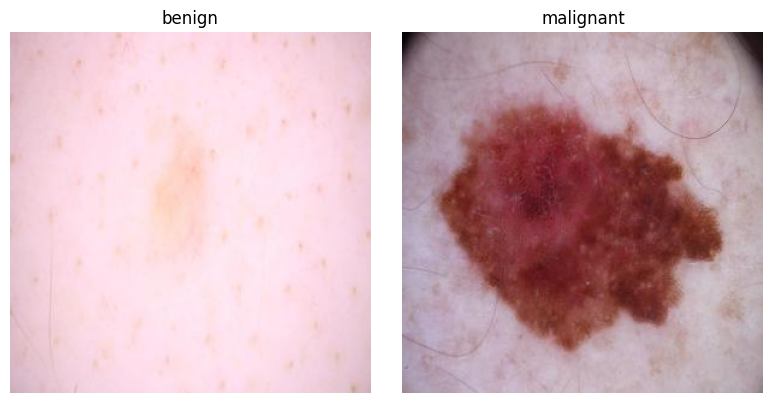

In [6]:
# Show random sample images from each class
fig, axes = plt.subplots(1, len(classes), figsize=(8, 4))
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    sample_img = random.choice(os.listdir(class_path))
    img = mpimg.imread(os.path.join(class_path, sample_img))
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(cls)
plt.tight_layout()
plt.show()

Images Count in Barchart

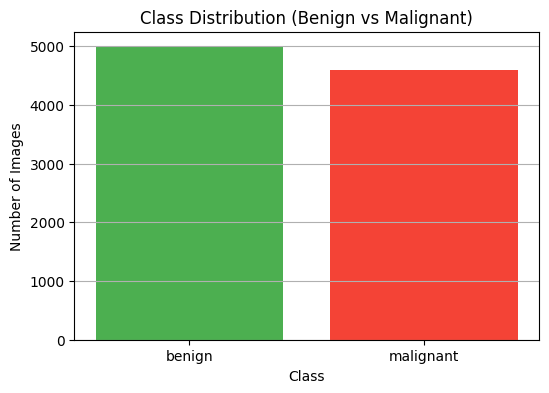

In [7]:
# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['#4CAF50', '#F44336'])
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()

In [8]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

### To See our Data attribute

In [9]:
print("Training data:")
train_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
# val_data = val_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
print("Testing data")
test_data = test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)


Training data:
Found 9605 images belonging to 2 classes.
Testing data
Found 1000 images belonging to 2 classes.


## Train Build Model Using MobileNetV2

In [13]:
from tensorflow.keras.applications import MobileNetV2

def build_mobilenet():
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
    base.trainable = False
    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    model = models.Model(inputs=base.input, outputs=x)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Now Train our Model with Google's MobileNet V2

In [14]:
mobilenet_model = build_mobilenet()
mobilenet_model.fit(train_data, epochs=15)
mobilenet_model.evaluate(test_data)

I0000 00:00:1750261984.541550      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1750261996.185596     109 service.cc:148] XLA service 0x786d20110ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750261996.186500     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750261997.040795     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/301 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.4358 - loss: 1.1022 

I0000 00:00:1750262000.503288     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


301/301 ━━━━━━━━━━━━━━━━━━━━ 69s 190ms/step - accuracy: 0.8267 - loss: 0.4021
Epoch 2/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.8977 - loss: 0.2431
Epoch 3/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.9194 - loss: 0.2038
Epoch 4/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9193 - loss: 0.1979
Epoch 5/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.9312 - loss: 0.1738
Epoch 6/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.9358 - loss: 0.1539
Epoch 7/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.9465 - loss: 0.1325
Epoch 8/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.9521 - loss: 0.1265
Epoch 9/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9551 - loss: 0.1172
Epoch 10/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9638 - loss: 0.0955
Epoch 11/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9671 - loss: 0.0887
Epoch 12/15
301/301 ━━━━━━━━━━━━━━━━━━━━

[0.3054962456226349, 0.8960000276565552]

### To Test For accuracy and other Metrics

In [15]:
# Import necessary Libires:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [16]:
# Predict probabilities and class labels
y_probs = mobilenet_model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_data.classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step


## Check Accuracy:

In [17]:
# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8960


### F1 Score, Precision, Recall

In [18]:
# F1 Score, Precision, Recall
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

      benign       0.90      0.89      0.90       500
   malignant       0.89      0.90      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



## For Confusion Matrix 

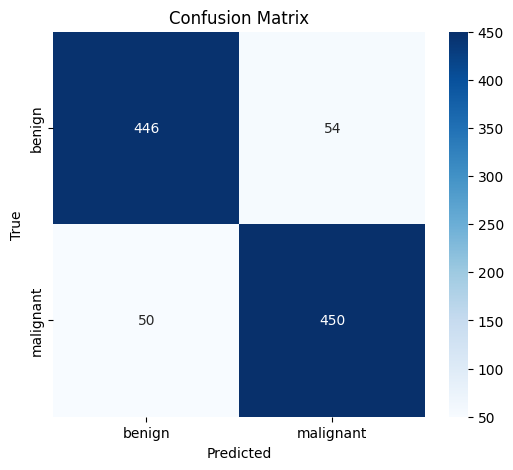

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Roc Curve and AUC

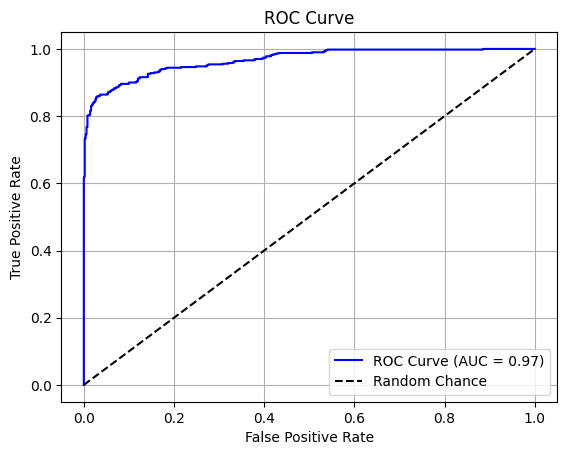

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Use probabilities of the positive class only (assumed index 1)
y_score = y_probs[:, 1]

# True binary labels
y_true_binary = (y_true == 1).astype(int)  # Adjust if 0/1 are flipped

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### To Save Our Model

In [22]:
# Save model to disk
mobilenet_model.save("saved_model/mobilenet_melanoma_model.h5")  # or use a different filename per model
print("Model saved successfully.")


Model saved successfully.


In [23]:
import os
os.makedirs("saved_model", exist_ok=True)

### Complete Mobile Net Model